In [121]:
import pandas as pd
from matplotlib import pyplot as plt

file_name = 'life-expectancy-vs-gdp-per-capita.csv'

df = pd.read_csv(file_name)

In [132]:
# Filter on the most recent data
df2018 = df[df.Year == 2018][df.Code != ''][df.Code != 'OWID_WRL']
df1950 = df[df.Year == 1950][df.Code != ''][df.Code != 'OWID_WRL']
dfworld = df[df.Code == 'OWID_WRL'][df.Year > 1950]

/tmp/ipykernel_19747/1586993503.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2018 = df[df.Year == 2018][df.Code != ''][df.Code != 'OWID_WRL']
/tmp/ipykernel_19747/1586993503.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1950 = df[df.Year == 1950][df.Code != ''][df.Code != 'OWID_WRL']
/tmp/ipykernel_19747/1586993503.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfworld = df[df.Code == 'OWID_WRL'][df.Year > 1950]


In [123]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62703 entries, 0 to 62702
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Entity                                 62703 non-null  object 
 1   Code                                   58395 non-null  object 
 2   Year                                   62703 non-null  int64  
 3   Life expectancy at birth (historical)  20449 non-null  float64
 4   GDP per capita                         19876 non-null  float64
 5   417485-annotations                     21 non-null     object 
 6   Population (historical estimates)      57718 non-null  float64
 7   Continent                              285 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.8+ MB


,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.7,1156.0,NaN,7480464.0,NaN
2,Afghanistan,AFG,1951,28.0,1170.0,NaN,7571542.0,NaN
3,Afghanistan,AFG,1952,28.4,1189.0,NaN,7667534.0,NaN
4,Afghanistan,AFG,1953,28.9,1240.0,NaN,7764549.0,NaN


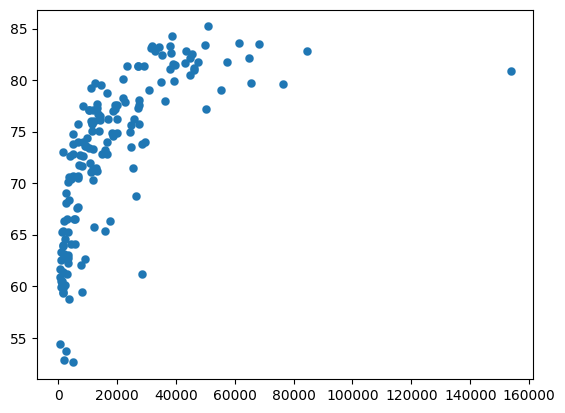

In [124]:
plt.scatter(df2018['GDP per capita'],df2018['Life expectancy at birth (historical)'],linewidths=0.1)

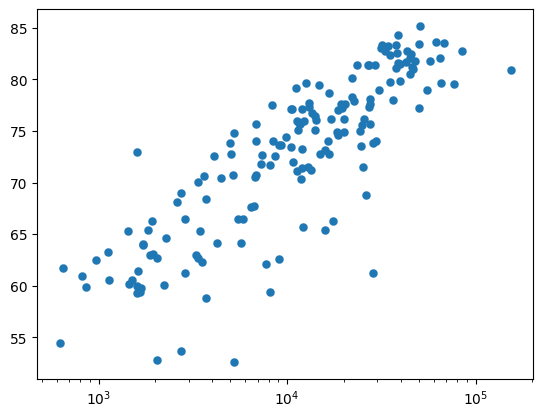

In [125]:
plt.scatter(df2018['GDP per capita'],df2018['Life expectancy at birth (historical)'],linewidths=0.1)
# put the x-axis on a logarithmic scale
ax = plt.gca()
ax.set_xscale('log')


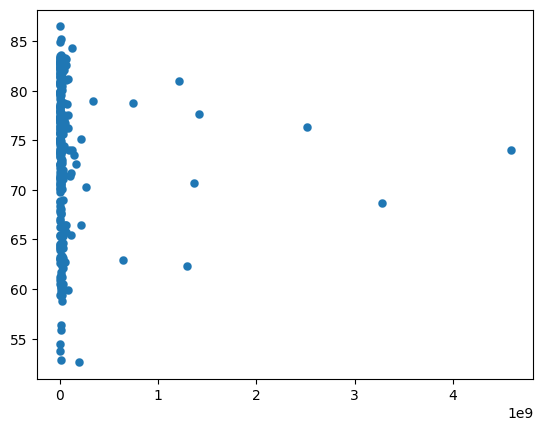

In [126]:
plt.scatter(df2018['Population (historical estimates)'],df2018['Life expectancy at birth (historical)'],linewidths=0.1)

(array([ 1.,  0.,  1.,  0.,  2.,  4.,  9., 19., 26., 22., 18., 17., 23.,
        16., 19., 22., 19.,  9., 18., 10.]),
 array([13.8 , 16.69, 19.58, 22.47, 25.36, 28.25, 31.14, 34.03, 36.92,
        39.81, 42.7 , 45.59, 48.48, 51.37, 54.26, 57.15, 60.04, 62.93,
        65.82, 68.71, 71.6 ]),
 <BarContainer object of 20 artists>)

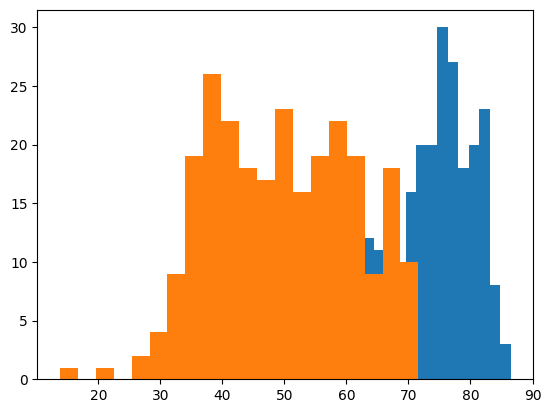

In [129]:
# HISTOGRAMS
plt.hist(df2018['Life expectancy at birth (historical)'],bins=20)
plt.hist(df1950['Life expectancy at birth (historical)'],bins=20)


TypeError: 'str' object is not callable

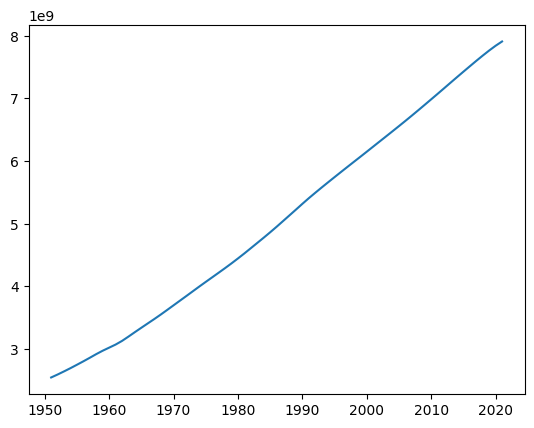

In [137]:
# DATA VISUALISATION
plt.plot(dfworld['Year'],dfworld['Population (historical estimates)'])

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World population evolution')

